# Example: using the DiskModel class

In [1]:
from util import *
from disk_model import *
import pickle
import matplotlib.pyplot as plt

In [2]:
# load interpolation tables for opacity and disk property
disk_opacity = pickle.load(open('./data/opacity_tables/disk_opacity.pkl','rb'))
disk_opacity_lam = pickle.load(open('./data/opacity_tables/disk_opacity_lam.pkl','rb'))
disk_property = pickle.load(open('./data/opacity_tables/disk_property.pkl','rb'))
# these tables already cover a wide range of parameters and usually we don't need to recompute them.
# but in case you do want to update these tables, you can go through generate_grain_opacity.ipynb,
# generate_disk_opacity.ipynb, and generate_disk_property.ipynb.

# initialize disk model object
DM = DiskModel(disk_opacity, disk_opacity_lam, disk_property)

## Set parameters and compute model

In [3]:
# update model parameters
DM.M = 0.8*Msun # total mass (disk+star)
DM.Rd = 200*au
DM.Mdot = 2e-6*Msun/yr

DM.Q10= 1.5 # Q at 10au
DM.Qs = 0. # radial slope: d log Q / d log r

DM.amax10= 2e-2 # amax at 10au (in cm)
DM.amaxs = -2.5 # radial slope: d log amax / d log r
DM.q = 2.5 # size distribution slope: dn/da \propto a^-q

# generate disk profile
DM.generate_disk_profile()

# generate mock observations
lam_obs = [0.87, 0.68, 0.13, 0.09] # in cm
DM.set_lam_obs_list(lam_obs)
cosI = 0.6
DM.generate_observed_flux(cosI, scattering=True)

## Plot results

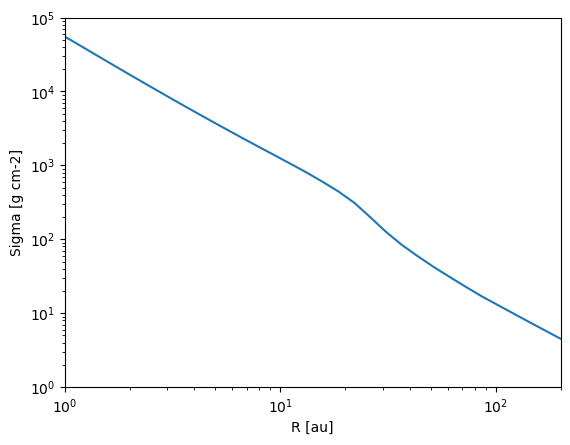

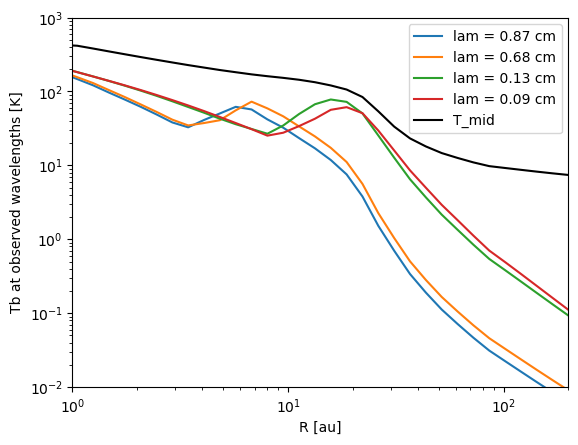

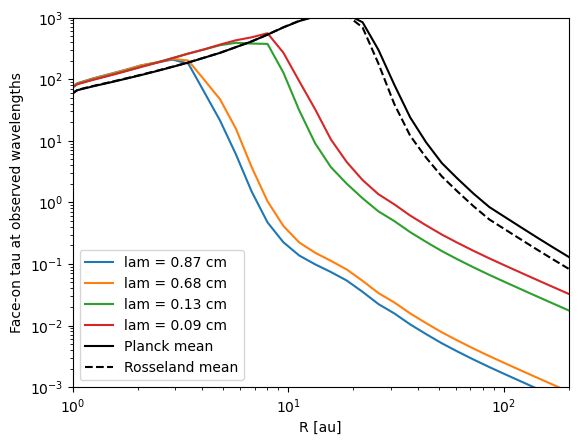

In [5]:
R_au = DM.R[1:]/au

plt.figure()
plt.plot(R_au, DM.Sigma)
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,200)
plt.ylim(1,1e5)
plt.ylabel('Sigma [g cm-2]')
plt.xlabel('R [au]')

plt.figure()
for i in range(4):
    plt.plot(R_au, DM.I_obs[i]*DM.lam_obs_list[i]**2 / (2*kB), label='lam = {:.2f} cm'.format(lam_obs[i])) 
    # above: converting spectral intensity I to brightness temperature
plt.plot(R_au, DM.T_mid, 'k', label='T_mid')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,200)
plt.ylim(1e-2,1000)
plt.ylabel('Tb at observed wavelengths [K]')
plt.xlabel('R [au]')
plt.legend()

plt.figure()
for i in range(4):
    plt.plot(R_au, DM.tau_obs[i], label='lam = {:.2f} cm'.format(lam_obs[i]))
plt.plot(R_au, DM.tau_p_mid*2,'k-', label='Planck mean')
plt.plot(R_au, DM.tau_r_mid*2,'k--', label='Rosseland mean')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,200)
plt.ylim(1e-3,1000)
plt.ylabel('Face-on tau at observed wavelengths')
plt.xlabel('R [au]')
plt.legend()
plt.show()